# Dynamical Decoupling (DD) Simulation
## Specific case: m=2 and t1=t2=t
Ideal system:  **$e^{-iZt}$** \
Noisy system: **$e^{-i(Z+\lambda{X})t}$**
#### Want to prove: 
**$e^{-i(Z+\lambda{X})t}Ze^{-i(Z+\lambda{X})t}Z \approx e^{-2iZt}$** 

### Libraries and Pauli Matrices 

In [1]:
import numpy as np
import scipy
import math
from scipy.linalg import expm, svd
import matplotlib.pyplot as plt
import scipy.optimize as spo

In [2]:
X, Z, I = np.matrix([[0, 1],[1, 0]]), np.matrix([[1, 0],[0, -1]]), np.matrix([[1, 0],[0, 1]])

### Simulation code

In [3]:
# creating the variables
time = []
epsilon = []

# set the value of lambda
lambda_value = 0.1

# simulating the equation for every 0.01s for 1s.
for t in np.linspace(0.0,1.0,num=101):
    A = expm(-1j*(Z+lambda_value*X)*t)*Z*expm(-1j*(Z+lambda_value*X)*t)*Z
    B = expm(-2j*Z*t)
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues,_ = svd(difference, compute_uv = False)
    max_eigenvalue = np.max(eigenvalues)
    # add the maximum eigen value to the array epsilon
    epsilon.append(max_eigenvalue)
    time.append(t) 
    
print("error at t1 = t2 = " + str(time[5]) + " is " + str(epsilon[5]))

error at t1 = t2 = 0.05 is 0.0004995820845830152


### Graph t vs $\epsilon$

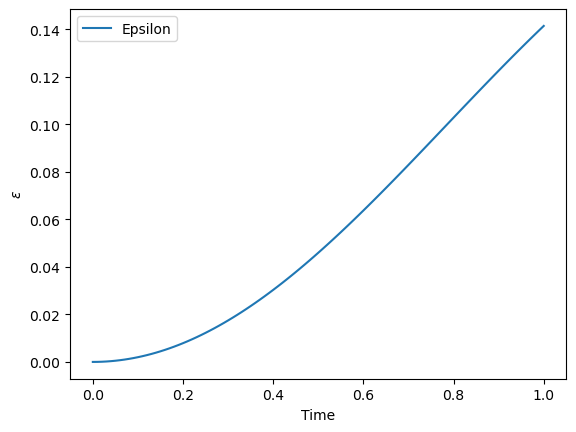

In [4]:
# graph the changes in epsilon respect to the time
plt.plot(time, epsilon, label = "Epsilon")

plt.xlabel('Time')
plt.ylabel('$\epsilon$')
plt.legend()

plt.savefig('first_simulation.png')
plt.show()


## General case
The generalization of the previous case is the following:\
Ideal system: **$e^{-iZs_1T}e^{-iZs_2T}e^{-iZs_3T}...e^{-iZs_mT}$** \
Noisy system: **$e^{-i(Z+\lambda{X})s_1T}e^{-i(Z+\lambda{X})s_2T}e^{-i(Z+\lambda{X})s_3T}...e^{-i(Z+\lambda{X})s_mT}$**
##### Error function:
**$\epsilon=||(e^{-i(Z+\lambda{X})s_1T}Ze^{-i(Z+\lambda{X})s_2T}Ze^{-i(Z+\lambda{X})s_3T}Ze^{-i(Z+\lambda{X})s_4T}Z...Ze^{-i(Z+\lambda{X})s_mT}Z) - e^{-iZT}||$**
### Simulation


In [5]:
def error_calculation(lambda_value, m, T, areEqual, s_values):
    prev_A = I
    
    # Case 1: Periodic DD when s1 = s2 = ... = sm 
    if (areEqual == True):
        for i in np.linspace(1,m,num=m):
            # even numbers
            if (i%2 == 0): 
                A = np.dot(prev_A, expm(-1j*(Z-lambda_value*X)*T/m)) 
                #prev_A * expm(-1j*(Z-lambda_value*X)*T/m)
            # odd numbers
            else:
                A = np.dot(prev_A, expm(-1j*(Z+lambda_value*X)*T/m))
                #prev_A * expm(-1j*(Z+lambda_value*X)*T/m)
            # updating the matrix A
            prev_A = A
    
    # Case 2: Concatenated DD or Uhrig DD when s has a different values       
    else:
        i = 1
        # simulating the equation 
        for s in s_values:
            # even numbers
            if (i%2 == 0):
                A = np.dot(prev_A, expm(-1j*(Z-lambda_value*X)*s*T))
                # prev_A * expm(-1j*(Z-lambda_value*X)*s*T)   
            # odd numbers
            else:
                A = np.dot(prev_A, expm(-1j*(Z+lambda_value*X)*s*T))
                # prev_A * expm(-1j*(Z+lambda_value*X)*s*T)
            # updating variables
            #print(A)
            prev_A = A 
            i+=1 
            
    B = expm(-1j*Z*T) 
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues = svd(difference, compute_uv = False)
    max_eigenvalue = np.max(eigenvalues)
    #print("The error is ", max_eigenvalue)
    return max_eigenvalue

def UDD_calculate_s_values(m):
    s_values = []
    prev_t = 0
    for j in range(1, m+1):
        t = np.power(np.sin(j*np.pi/(2*m)), 2)
        s_values.append(t-prev_t)
        prev_t = t
    return s_values        


In [6]:
# creating the variables
m_value_c1 = []
m_value_c2 = [2,3,6,11]
m_value_c3 = [2,3,4,6,8,10]
error_c1 = []
error_c2 = []
error_c3 = []

# set the value of lambda and T
lambda_value = 0.1
T = 0.1

print("Case 1 (PDD) Even ##########################")
for m in range(2,11,2):
    error_c1.append(error_calculation(lambda_value, m, T, True, []))
    m_value_c1.append(m)
    print("For m = " + str(m) + " the error is " + str(error_calculation(lambda_value, m, T, True, [])))

print("\nCase 2 (CDD) ##########################")
error_c2.append(error_calculation(lambda_value, 2, T, False, [1/2,1/2]))
print("For m = 2 the error is " + str(error_c2[0]))

error_c2.append(error_calculation(lambda_value, 3, T, False, [1/4,1/2,1/4]))
print("For m = 3 the error is " + str(error_c2[1]))

error_c2.append(error_calculation(lambda_value, 6, T, False, [1/8,1/4,1/8,1/8,1/4,1/8]))
print("For m = 6 the error is " + str(error_c2[2]))

error_c2.append(error_calculation(lambda_value, 11, T, False, [1/16,1/8,1/16,1/16,1/8,1/8,1/8,1/16,1/16,1/8,1/16]))
print("For m = 11 the error is " + str(error_c2[3]))


print("\nCase 3 (UDD) ##########################")
error_c3.append(error_calculation(lambda_value, 2, T, False, UDD_calculate_s_values(2)))
print("For m = 2 the error is " + str(error_c3[0]))

error_c3.append(error_calculation(lambda_value, 3, T, False, UDD_calculate_s_values(3)))
print("For m = 3 the error is " + str(error_c3[1]))

error_c3.append(error_calculation(lambda_value, 4, T, False, UDD_calculate_s_values(4)))
print("For m = 4 the error is " + str(error_c3[2]))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(6)))
print("For m = 6 the error is " + str(error_c3[3]))
print(UDD_calculate_s_values(6))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(8)))
print("For m = 8 the error is " + str(error_c3[4]))
print(UDD_calculate_s_values(8))


error_c3.append(error_calculation(lambda_value, 10, T, False, UDD_calculate_s_values(10)))
print("For m = 10 the error is " + str(error_c3[5]))
print(UDD_calculate_s_values(10))


Case 1 (PDD) Even ##########################
For m = 2 the error is 0.0004995820845830152
For m = 4 the error is 0.000249635378216025
For m = 6 the error is 0.00016640438462290198
For m = 8 the error is 0.00012479824917967564
For m = 10 the error is 9.983673349921259e-05

Case 2 (CDD) ##########################
For m = 2 the error is 0.0004995820845830152
For m = 3 the error is 1.2499098133246424e-05
For m = 6 the error is 1.8775597711948834e-07
For m = 11 the error is 2.6064627389811953e-08

Case 3 (UDD) ##########################
For m = 2 the error is 0.0004995820845830133
For m = 3 the error is 1.249909813324385e-05
For m = 4 the error is 2.903186326102563e-07
For m = 6 the error is 8.175186759985752e-08
[0.06698729810778066, 0.1830127018922193, 0.24999999999999994, 0.25, 0.18301270189221952, 0.06698729810778059]
For m = 8 the error is 4.4556009403826754e-08
[0.03806023374435662, 0.10838637566236962, 0.16221167441072884, 0.1913417161825448, 0.19134171618254503, 0.1622116744107288, 

In [7]:
# values found below

m_values_optimized = [2,3,4,6,8,10] 

error_optimized = [0.0004995710092225798,1.236075718295921e-10,1.1071127189316508e-10,1.193014696221322e-10,1.540096755545166e-10,1.015284370818514e-10]

### Graph t vs $\epsilon$

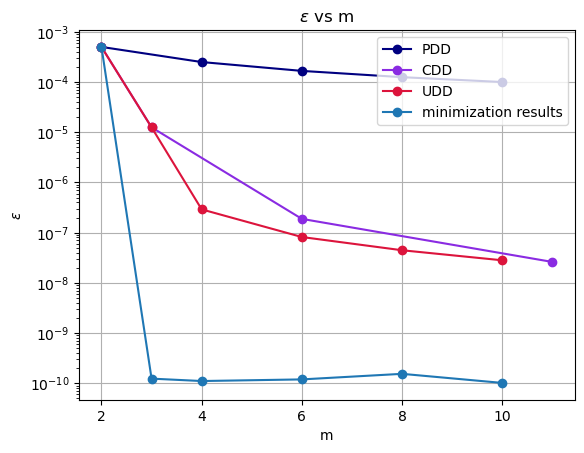

In [8]:
# graph the changes of the error for different values of m

plt.plot(m_value_c1, error_c1, color='navy', marker='o', label = "PDD")
plt.plot(m_value_c2, error_c2, color='blueviolet', marker='o', label = "CDD")
plt.plot(m_value_c3, error_c3, color='crimson', marker='o', label = "UDD")
plt.plot(m_values_optimized, error_optimized, marker='o', label = "minimization results")


plt.title('$\epsilon$ vs m')
plt.xlabel('m')
plt.ylabel('$\epsilon$')
plt.yscale("log")

plt.legend()
plt.grid()

plt.savefig('general_simulation.png')
plt.show()


## Minimize the $\epsilon$ function for a fixed T = 0.1 and m


### $\lambda\$ = 0.1 

In [9]:
def epsilon_func(s_values):
    i = 1
    prev_A = I
    lambda_value = 0.1
    T = 0.1
    # simulating the equation 
    for s in s_values:
        # even numbers
        if (i%2 == 0):
            A = prev_A @ expm(-1j*(Z-lambda_value*X)*s*T)   
        # odd numbers
        else:
            A = prev_A @ expm(-1j*(Z+lambda_value*X)*s*T)
        # updating variables
        prev_A = A 
        i+=1 
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

def minimize_epsilon_SLSQP(m, s_values_start):
    s_result = []
    # Define constraints
    const = ({'type':'eq',
              'fun' : lambda s_values : (np.sum(s_values) - 1)})
    # Bounds of Si
    bounds = ((0,1) for _ in range(m))

    # Options
    options = {'disp'    : False,
               'ftol'    : 1e-12,
               'eps'     : 1e-12,
               'maxiter' : 1000}

    # Minimization
    result = spo.minimize(epsilon_func, s_values_start, method='SLSQP', options=options, constraints = const, bounds = bounds)

    epsilon = result.fun
    for i in range(m):
        si = result.x[i]
        s_result.append(si)
    
    return s_result, epsilon 

def minimize_epsilon_BFGS(m, s_values_start):
    s_result = []
    # Bounds of Si
    bounds = ((0,1) for _ in range(m))

    # Options
    options = {'disp'    : False,
               'ftol'    : 1e-10}
    
    # Minimization
    result = spo.minimize(epsilon_func, s_values_start, method='L-BFGS-B', options= options, bounds = bounds)

    epsilon = result.fun
    for i in range(m):
        si = result.x[i]
        s_result.append(si)
        
    return s_result, epsilon 

def return_min_value(iterations, m_value, method):
    hashmap_epsilon_to_s = {}
    if(method == 'SLSQP'):
        # random initial values
        for i in range(iterations):
            s_values, epsilon = minimize_epsilon_SLSQP(m_value,[np.random.random() for _ in range(m_value)])
            hashmap_epsilon_to_s[epsilon] = s_values
        # evenly separated initial values
        s_values, epsilon = minimize_epsilon_SLSQP(m_value, [1/m_value for _ in range(m_value)])
        hashmap_epsilon_to_s[epsilon] = s_values
        # s-values of UDD
        s_values, epsilon = minimize_epsilon_SLSQP(m_value, UDD_calculate_s_values(m_value))
        hashmap_epsilon_to_s[epsilon] = s_values
        
    elif(method == 'L-BFGS-B'):
        # random initial values
        for i in range(iterations):
            s_values, epsilon = minimize_epsilon_BFGS(m_value,[np.random.random() for _ in range(m_value)])
            hashmap_epsilon_to_s[epsilon] = s_values
        # evenly separated initial values
        s_values, epsilon = minimize_epsilon_BFGS(m_value, [1/m_value for _ in range(m_value)])
        hashmap_epsilon_to_s[epsilon] = s_values
        # s-values of UDD
        s_values, epsilon = minimize_epsilon_BFGS(m_value, UDD_calculate_s_values(m_value))
        hashmap_epsilon_to_s[epsilon] = s_values
            
    else:
        print("invalid method")

    #print(hashmap_epsilon_to_s) 
    min_value = min(hashmap_epsilon_to_s)
    
    return min_value, hashmap_epsilon_to_s[min_value] 


#### When m = 2

In [10]:
m_value = 2

epsilon, s_values = return_min_value(20, m_value, 'SLSQP')
print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

epsilon, s_values = return_min_value(20, m_value, 'L-BFGS-B')
print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

SLSQP METHOD: Minimum error =  0.0004995820845830133  s_values:  [0.4999999999999999, 0.5000000000000001]
L-BFGS-B METHOD: Minimum error =  0.0004995710092227323  s_values:  [0.49998335255062215, 0.4999833815329807]


In [11]:
# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.4999999999999999, 0.5000000000000001]))
print(epsilon_func([0.49999999991086985, 0.50000000008913]))
print(epsilon_func([0.49999999967918407, 0.500000000320816]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([0.4999833655591059, 0.49998336523893533]))
print(epsilon_func([0.4999833675827254, 0.4999833660701465]))
print(epsilon_func([0.4999833674493945, 0.4999833673403859]))

Minimum values found by SLSQP Method
0.0004995820845830133
0.0004995820845830134
0.0004995820845829026
Minimum values found by L-BFGS-B Method
0.0004995710092228324
0.0004995710092226593
0.0004995710092225798


#### When m = 3

In [12]:
m_value = 3

epsilon, s_values = return_min_value(20, m_value, 'SLSQP')
print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

epsilon, s_values = return_min_value(20, m_value, 'L-BFGS-B')
print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

#options
#options = {'disp'    : True,
#           'eps'     : 1e-10,
#           'maxiter' : 1000,
#           'ftol'    : 1e-10}



SLSQP METHOD: Minimum error =  4.162997197854774e-07  s_values:  [0.250312640722381, 0.49937460945592627, 0.25031274982169643]
L-BFGS-B METHOD: Minimum error =  1.172446795616754e-10  s_values:  [0.25031371327935265, 0.4993766930214737, 0.25031375690714536]


In [13]:
# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.2503122685933116, 0.4993754354643486, 0.2503122959423398]))
print(epsilon_func([0.25031270183562715, 0.4993746113471729, 0.2503126868172]))
print(epsilon_func([0.2503126942322201, 0.49937461122542787, 0.250312694542352]))
print(epsilon_func([0.2503126942309021, 0.4993746112692983, 0.2503126944997997]))
print(epsilon_func([0.25031268630866343, 0.4993746037748959, 0.2503127099170955]))
print(epsilon_func([0.25031262798463816, 0.4993746105027046, 0.2503127615133109]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([0.250313761135165, 0.499376680102535, 0.25031372106888927]))
print(epsilon_func([0.25031378610463756, 0.4993766826139664, 0.25031369349300925]))
print(epsilon_func([0.2503137962229766, 0.49937668537468544, 0.25031368125624537]))
print(epsilon_func([0.25031371327935265, 0.4993766930214737, 0.25031375690714536]))


Minimum values found by SLSQP Method
4.16625149324994e-07
4.1629970464508926e-07
4.162997043882179e-07
4.162997043701857e-07
4.162996661821069e-07
4.1629966060826947e-07
Minimum values found by L-BFGS-B Method
1.646296328376731e-10
1.5398325411105099e-10
1.236075718295921e-10


#### When m = 4


In [14]:
m_value = 4

epsilon, s_values = return_min_value(20, m_value, 'SLSQP')
print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

epsilon, s_values = return_min_value(20, m_value, 'L-BFGS-B')
print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

SLSQP METHOD: Minimum error =  2.0223794498528865e-07  s_values:  [0.14652006199423936, 0.3534793118560857, 0.3534799394442534, 0.14652068670597007]
L-BFGS-B METHOD: Minimum error =  1.1380487382033917e-10  s_values:  [0.15966140827059433, 0.36705825189735464, 0.3404065182866307, 0.13287586874853383]


In [15]:
# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.14657893998012378, 0.35342105961862347, 0.3534210602510726, 0.1465789401501801]))
print(epsilon_func([0.14652031525235185, 0.3534796416866653, 0.353479695264094, 0.1465203477968889]))
print(epsilon_func([0.14652032059044803, 0.353479681868749, 0.3534796794126597, 0.14652031812814334]))
print(epsilon_func([0.14652031895308476, 0.3534796801977871, 0.35347968104132854, 0.14652031980779961]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([0.16614280597213285, 0.37414686793828494, 0.3339591267076344, 0.12575327870472833]))
print(epsilon_func([0.164781674448304, 0.37263571703012993, 0.33531305684028445, 0.12727162321540195]))
print(epsilon_func( [0.042870723913703106, 0.2736688177255909, 0.4566713901413575, 0.22679226019653698]) )

Minimum values found by SLSQP Method
2.6139756852245004e-07
2.0223804668848119e-07
2.0223793311677798e-07
2.022379331055514e-07
Minimum values found by L-BFGS-B Method
1.1587771307987028e-10
1.1071127189316508e-10
2.374416212718345e-10


#### When m = 6

In [16]:
m_value = 6

epsilon, s_values = return_min_value(20, m_value, 'SLSQP')
print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

epsilon, s_values = return_min_value(20, m_value, 'L-BFGS-B')
print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

SLSQP METHOD: Minimum error =  7.551542404217626e-08  s_values:  [0.10818329268602887, 0.2211585902859407, 0.1690906633125205, 0.17203574424349682, 0.22273040920533232, 0.1068013002664889]
L-BFGS-B METHOD: Minimum error =  3.2336604284023365e-10  s_values:  [0.06698743390384838, 0.18301283768879714, 0.2500001357958952, 0.25000013579589336, 0.18301283768879548, 0.06698743390384831]


In [17]:
# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.10910832178667179, 0.22407446256631602, 0.16682740781295394, 0.16683724450407955, 0.22406431048024267, 0.10908825284973601]))
print(epsilon_func([0.10588111287187135, 0.23477599597343882, 0.20813314114895248, 0.17445904822125238, 0.18598807981730012, 0.09076262196718503]))
print(epsilon_func([0.08115803715423694, 0.19088757688004415, 0.21217126097154654, 0.21792587193270252, 0.20666020397943302, 0.09119704908203678]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([0.06698743390385065, 0.18301283768880242, 0.2500001357958963, 0.25000013579589675, 0.1830128376888011, 0.06698743390385282]))
print(epsilon_func([3.002568575565669e-11, 0.19226485891928957, 0.20052717820453525, 0.0968542222853414, 0.29898736358357786, 0.21136866390320677]))
print(epsilon_func([0.18318333858053404, 0.19762749926476317, 0.0017600867329253978, 0.1976272306137198, 0.31525492323346144, 0.10454913737516315]))
print(epsilon_func([0.1193189747626099, 0.13300726613836156, 0.09491711204974132, 0.2599696875342908, 0.2858709215136466, 0.10691726277087903]))
print(epsilon_func([0.12227497219810501, 0.17806746041581603, 0.09024379222233403, 0.20065699260650854, 0.2875240364733113, 0.12123386877698408]))

Minimum values found by SLSQP Method
7.705138211429409e-08
7.252268247703506e-08
6.973664579126629e-08
Minimum values found by L-BFGS-B Method
3.233641584671885e-10
1.952486630752129e-10
1.5322958172706372e-10
2.1968116728874744e-10
1.193014696221322e-10


#### When m = 8

In [18]:
m_value = 8

epsilon, s_values = return_min_value(20, m_value, 'SLSQP')
print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

epsilon, s_values = return_min_value(20, m_value, 'L-BFGS-B')
print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

SLSQP METHOD: Minimum error =  4.1772137723542425e-08  s_values:  [0.0891373412773588, 0.1581745059695234, 0.11355206170543093, 0.14147544630901923, 0.13911997598697648, 0.11332492781515456, 0.15819601825685095, 0.08701972267971353]
L-BFGS-B METHOD: Minimum error =  2.0185950951451734e-10  s_values:  [0.038060289197623734, 0.10838643111560399, 0.16221172986391763, 0.19134177163569946, 0.19134177163569951, 0.1622117298639156, 0.10838643111560309, 0.03806028919762314]


In [19]:
# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.08915028332374811, 0.16066107804400595, 0.11316561091250425, 0.13702441164206514, 0.13702361737515267, 0.11316624492816715, 0.16066046721461813, 0.08914828655973867]))
print(epsilon_func([0.08915004552240306, 0.16066103188805328, 0.11316580035396968, 0.13702439761109078, 0.13702366410074956, 0.11316639014088864, 0.1606604938519956, 0.08914817653084944]))
print(epsilon_func([0.05935928565046837, 0.12948460286044516, 0.106214630589151, 0.12537400745591146, 0.16873353431206917, 0.1570677605596407, 0.1656400225308929, 0.08812615604142127]))
print(epsilon_func([0.0891373412773588, 0.1581745059695234, 0.11355206170543093, 0.14147544630901923, 0.13911997598697648, 0.11332492781515456, 0.15819601825685095, 0.08701972267971353]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([0.038060289197624234, 0.10838643111560388, 0.16221172986391613, 0.19134177163569888, 0.19134177163570046, 0.16221172986391763, 0.10838643111560466, 0.03806028919762364]))
print(epsilon_func([0.038060289197623734, 0.10838643111560399, 0.16221172986391763, 0.19134177163569946, 0.19134177163569951, 0.1622117298639156, 0.10838643111560309, 0.03806028919762314]))
print(epsilon_func([0.13406083458828458, 0.13345016079009892, 0.06339083938260887, 0.10792967735708747, 0.027611282075697324, 0.15792916335235058, 0.27507579732908255, 0.10055345481144032]))
print(epsilon_func([0.10411501670327519, 0.13704351618314636, 0.05570086903062917, 0.11607893667874317, 0.063154546027316, 0.11273311670888113, 0.27700220278078264, 0.1341727685490789]))
print(epsilon_func([0.13543790031373729, 0.3054044138804244, 0.1872558616467772, 2.472839749136672e-07, 0.055520231283083046, 0.11177620353198638, 0.1218184630497779, 0.08278779985410627]))

Minimum values found by SLSQP Method
4.216038555823948e-08
4.215670862250755e-08
3.953291028982529e-08
4.1772137723542425e-08
Minimum values found by L-BFGS-B Method
2.0185918764670236e-10
2.0185950982032252e-10
1.540096755545166e-10
1.5155050004889306e-10
1.4641123155277612e-10


#### When m = 10

In [20]:
m_value = 10

epsilon, s_values = return_min_value(20, m_value, 'SLSQP')
print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

epsilon, s_values = return_min_value(20, m_value, 'L-BFGS-B')
print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

SLSQP METHOD: Minimum error =  2.674189318740754e-08  s_values:  [0.07586110104005189, 0.1225019616392503, 0.08800469513026972, 0.11406822520204672, 0.10051687658564909, 0.10053160844119684, 0.11012772537173067, 0.08761253265550466, 0.12549382784278126, 0.07528144609151938]
L-BFGS-B METHOD: Minimum error =  1.1841079103978527e-10  s_values:  [0.07576006209073334, 0.12424965703155054, 0.08786550910812486, 0.1121296992294116, 0.0999952050726772, 0.0999952147483519, 0.1121296957118042, 0.08786551439191796, 0.12424966489260365, 0.07576004532728657]


In [21]:
# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.07568415407737258, 0.12416067526200436, 0.08791043655425992, 0.11216779819442363, 0.10007789726161764, 0.10007787505413628, 0.11216743558212058, 0.0879101280674159, 0.124160054918517, 0.0756835450281322]))
print(epsilon_func([0.07568406622439884, 0.12416062524225233, 0.08791055975462658, 0.1121677280036812, 0.10007795514711366, 0.10007792212745426, 0.11216738715940267, 0.08791025208764376, 0.12416003600225003, 0.07568346825117656]))
print(epsilon_func( [0.07568326384617458, 0.12415965053330888, 0.08791044430577105, 0.11216767691755845, 0.1000782598670787, 0.10007850169535733, 0.1121679190300437, 0.08791054519179863, 0.12416011511529271, 0.07568362349761602]))
print(epsilon_func([0.07586110104005189, 0.1225019616392503, 0.08800469513026972, 0.11406822520204672, 0.10051687658564909, 0.10053160844119684, 0.11012772537173067, 0.08761253265550466, 0.12549382784278126, 0.07528144609151938]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([0.024471769814348752, 0.07101978892202189, 0.1106158990031438, 0.13938415692065945, 0.1545085251493619, 0.15450852514936264, 0.1393841569206586, 0.11061589900314339, 0.07101978892202118, 0.02447176981434826]))
print(epsilon_func([0.07576006209073353, 0.12424965703155033, 0.08786550910812496, 0.1121296992294115, 0.0999952050726772, 0.0999952147483519, 0.11212969571180409, 0.08786551439191806, 0.12424966489260345, 0.07576004532728677]))
print(epsilon_func([1.7829129530435448e-07, 0.05528569140982053, 0.1353838812753917, 6.698355004261724e-07, 0.0005043066254334524, 0.14971740760454286, 0.21893375189965195, 0.2948759048301394, 0.14529901848731552, 1.8162168354368122e-07]))
print(epsilon_func([0.11134101758396925, 0.24287679818993924, 0.0815400816835968, 0.09962227254581603, 0.14393330992598719, 3.115543944154551e-07, 0.08154058586076601, 3.128772343372055e-07, 0.0815405752411552, 0.15760617287419573]))

Minimum values found by SLSQP Method
2.6781363149059955e-08
2.677763177056744e-08
2.677741119879992e-08
2.674189318740754e-08
Minimum values found by L-BFGS-B Method
1.5116695577441666e-10
1.184107876492388e-10
1.015284370818514e-10
9.253185965771441e-11
